In [1]:
import pickle
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline

In [3]:
#import dataframe
with open('processed_df.pickle', 'rb') as data:
    df = pickle.load(data)
    
# import train features
with open('train_features.pickle', 'rb') as data:
     train_features = pickle.load(data)

# import train labels
with open('train_labels.pickle', 'rb') as data:
     train_labels = pickle.load(data)
        
# import test features
with open('test_features.pickle', 'rb') as data:
     test_features = pickle.load(data)
        
# import test labels
with open('test_labels.pickle', 'rb') as data:
     test_labels = pickle.load(data)
        
# import tfidf
with open('tfidf.pickle', 'rb') as data:
     tfidf = pickle.load(data)

In [4]:
mnb_classifier = MultinomialNB()

In [5]:
mnb_classifier.fit(train_features, train_labels)

MultinomialNB()

In [6]:
mnb_prediction = mnb_classifier.predict(test_features)

In [7]:
training_accuracy = accuracy_score(train_labels, mnb_classifier.predict(train_features))
print(training_accuracy)

0.944327731092437


In [8]:
testing_accuracy = accuracy_score(test_labels, mnb_prediction)
print(testing_accuracy)

0.9377450980392157


In [9]:
print(classification_report(test_labels, mnb_prediction))

              precision    recall  f1-score   support

           0       0.69      0.16      0.26       139
           1       0.94      0.99      0.97      1901

    accuracy                           0.94      2040
   macro avg       0.81      0.58      0.61      2040
weighted avg       0.92      0.94      0.92      2040



In [10]:
conf_matrix = confusion_matrix(test_labels, mnb_prediction)
print(conf_matrix)

[[  22  117]
 [  10 1891]]


In [11]:
with open('mnb_classifier.pickle','wb') as data:
    pickle.dump(mnb_classifier, data)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier

from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),

    SGDClassifier(),
    PassiveAggressiveClassifier()
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, train_features, train_labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

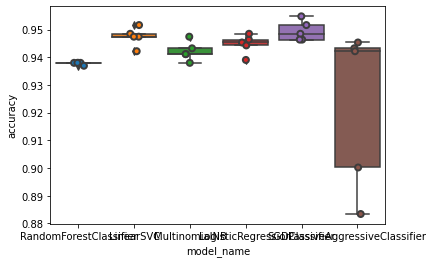

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=6, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [27]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                      0.947479
LogisticRegression             0.944748
MultinomialNB                  0.942227
PassiveAggressiveClassifier    0.922899
RandomForestClassifier         0.937815
SGDClassifier                  0.949580
Name: accuracy, dtype: float64

## Trying on Linear SVC

In [28]:
from sklearn.svm import LinearSVC

In [29]:
linear = LinearSVC()

In [30]:
linear.fit(train_features, train_labels)

LinearSVC()

In [31]:
linear_prediction = linear.predict(test_features)

In [32]:
training_accuracy = accuracy_score(train_labels, linear.predict(train_features))
print(training_accuracy)

0.9638655462184874


In [33]:
testing_accuracy = accuracy_score(test_labels, linear_prediction)
print(testing_accuracy)

0.946078431372549


In [34]:
conf_matrix = confusion_matrix(test_labels, linear_prediction)
print(conf_matrix)

[[  52   87]
 [  23 1878]]


In [35]:
print(classification_report(test_labels, linear_prediction))

              precision    recall  f1-score   support

           0       0.69      0.37      0.49       139
           1       0.96      0.99      0.97      1901

    accuracy                           0.95      2040
   macro avg       0.82      0.68      0.73      2040
weighted avg       0.94      0.95      0.94      2040



In [36]:
with open('linear_classifier.pickle','wb') as data:
    pickle.dump(linear, data)